In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [8]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [10]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

In [12]:
df.dtypes

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сгруппируйте данные по дате, посчитайте количество продаж

In [18]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [59]:
grouped_df.tail()

,Дата,Количество
200,2018-08-26,5302
201,2018-08-28,5983
202,2018-08-29,4969
203,2018-08-30,4648
204,2018-08-31,4570


In [23]:
grouped_df.columns

Index(['Дата', 'Количество'], dtype='object')

In [25]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Дата        205 non-null    datetime64[ns]
 1   Количество  205 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.3 KB


Нарисуйте график продаж у `grouped_df`

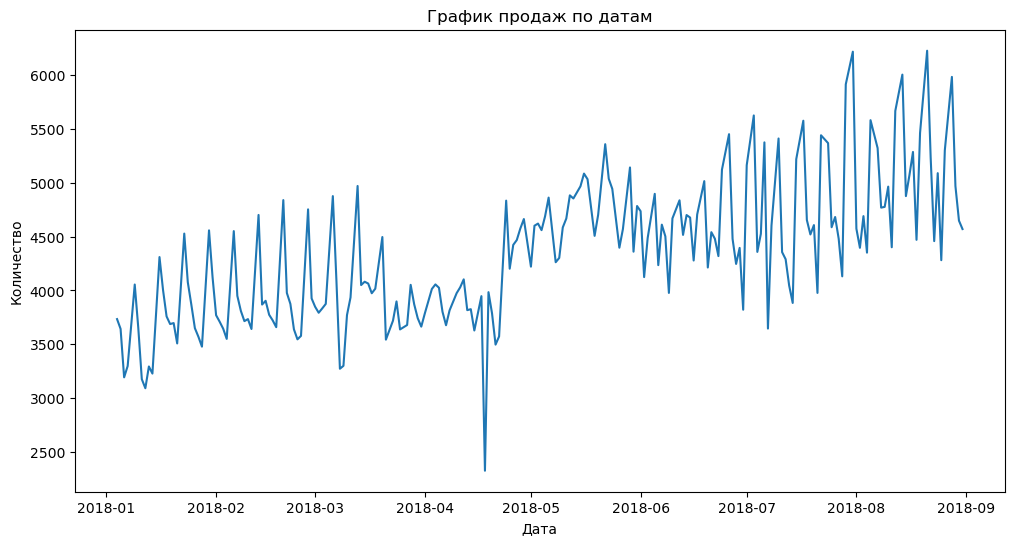

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'])
plt.title('График продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

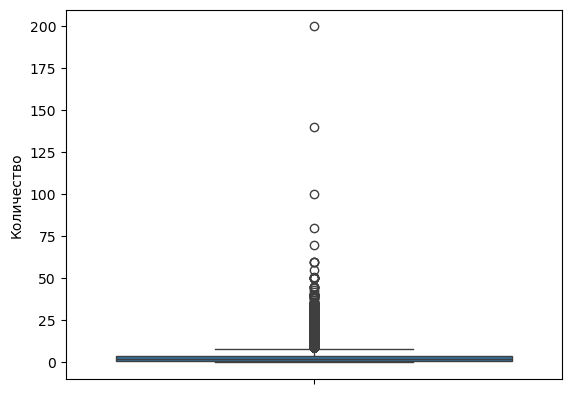

In [32]:
sns.boxplot(df['Количество'])
plt.show()

In [33]:
max_df = df[df['Количество']==200]

In [36]:
max_df

,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [39]:
df_3 = df[df['Склад'] == 3]

In [41]:
df_3.head()

,Дата,Склад,Контрагент,Номенклатура,Количество
796,2018-01-04,3,address_79,product_0,0
797,2018-01-04,3,address_79,product_1,5
798,2018-01-04,3,address_79,product_2,3
799,2018-01-04,3,address_79,product_3,2
800,2018-01-04,3,address_79,product_4,2


In [43]:
df_month = df_3[df_3['Дата'].dt.month.isin([6,7,8])]

In [45]:
df_month.head()

,Дата,Склад,Контрагент,Номенклатура,Количество
185268,2018-06-01,3,address_186,product_0,4
185269,2018-06-01,3,address_186,product_1,6
185270,2018-06-01,3,address_186,product_2,6
185271,2018-06-01,3,address_186,product_3,2
185272,2018-06-01,3,address_186,product_4,2


In [47]:
df_wed = df_month[df_month['Дата'].dt.dayofweek==2]

In [49]:
df_wed.head()

,Дата,Склад,Контрагент,Номенклатура,Количество
191165,2018-06-06,3,address_206,product_0,2
191166,2018-06-06,3,address_206,product_1,4
191167,2018-06-06,3,address_206,product_2,4
191168,2018-06-06,3,address_206,product_3,2
191169,2018-06-06,3,address_206,product_4,1


In [51]:
grouped_df_wed = df_wed.groupby('Номенклатура')['Количество'].sum().reset_index()

In [53]:
grouped_df_wed.sort_values(by='Количество', ascending=False).head(1)

,Номенклатура,Количество
1,product_1,2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [91]:
temp_data = pd.read_csv('temp.csv')

In [93]:
temp_data.reset_index(inplace=True)

In [95]:
temp_data.columns

Index(['index', 'Дата;Температура'], dtype='object')

In [97]:
temp_data.columns = ['Temp Date', 'Avg Temp']

In [99]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Temp Date  240 non-null    int64 
 1   Avg Temp   240 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [101]:
temp_data.head()

,Temp Date,Avg Temp
0,0,31.08.2018;11
1,1,30.08.2018;14
2,2,29.08.2018;14
3,3,28.08.2018;14
4,4,27.08.2018;13


In [103]:
temp_data.dtypes

Temp Date     int64
Avg Temp     object
dtype: object

In [114]:
temp_data['Temp Date'] = temp_data['Avg Temp'].str.split(';').str[0]

In [120]:
temp_data['Avg Temp'] = temp_data['Avg Temp'].str.split(";").str[1]

In [122]:
temp_data.head()

,Temp Date,Avg Temp
0,31.08.2018,11
1,30.08.2018,14
2,29.08.2018,14
3,28.08.2018,14
4,27.08.2018,13


In [124]:
temp_data['Temp Date'] = pd.to_datetime(temp_data['Temp Date'], format='%d.%m.%Y')

In [126]:
temp_data.head()

,Temp Date,Avg Temp
0,2018-08-31,11
1,2018-08-30,14
2,2018-08-29,14
3,2018-08-28,14
4,2018-08-27,13


In [128]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Temp Date  240 non-null    datetime64[ns]
 1   Avg Temp   240 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.9+ KB


In [134]:
merged_df = pd.merge(grouped_df, temp_data, left_on='Дата', right_on='Temp Date', how='left')

In [136]:
merged_df.head()

,Дата,Количество,Temp Date,Avg Temp
0,2018-01-04,3734,2018-01-04,-14
1,2018-01-05,3643,2018-01-05,-17
2,2018-01-06,3193,2018-01-06,-13
3,2018-01-07,3298,2018-01-07,-13
4,2018-01-09,4055,2018-01-09,-6


In [138]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Дата        205 non-null    datetime64[ns]
 1   Количество  205 non-null    int64         
 2   Temp Date   205 non-null    datetime64[ns]
 3   Avg Temp    205 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 6.5+ KB


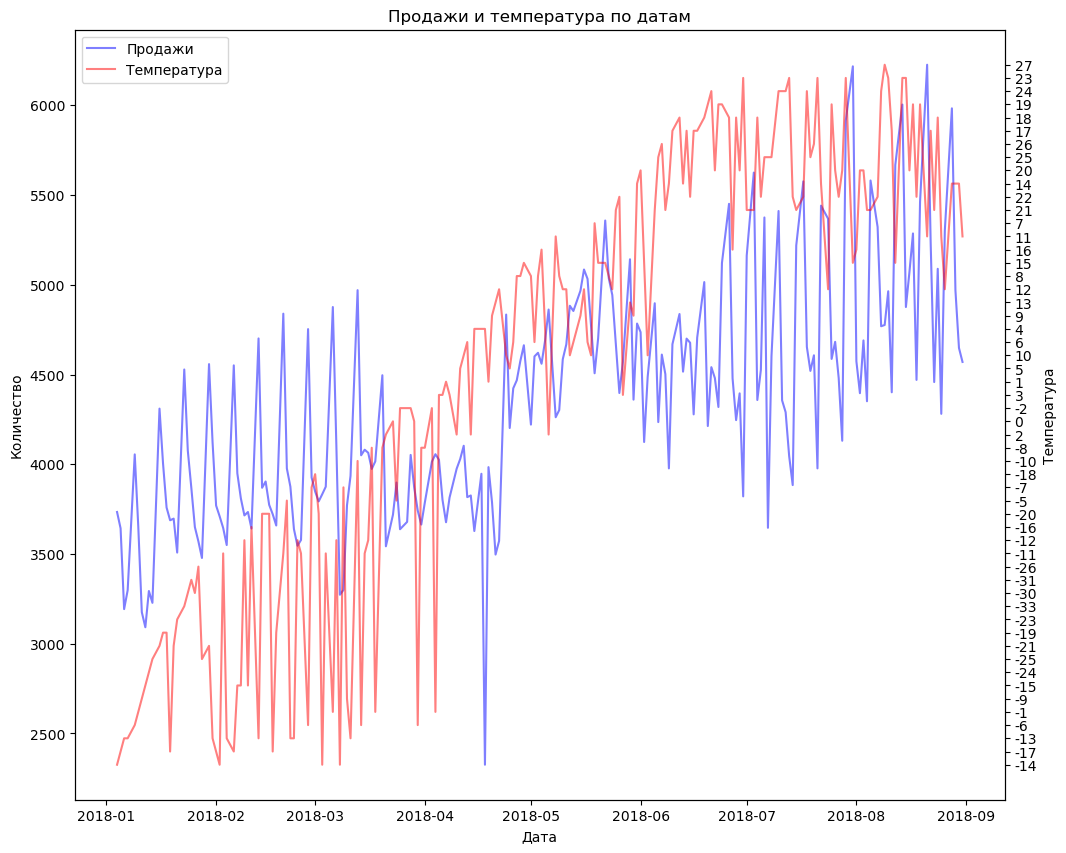

In [144]:
fig, ax1 = plt.subplots(figsize=(12, 10))

line1, = ax1.plot(merged_df['Дата'], merged_df['Количество'], alpha=0.5, color='blue', label='Продажи')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество')

ax2 = ax1.twinx()
line2, = ax2.plot(merged_df['Дата'], merged_df['Avg Temp'], alpha=0.5, color='red', label='Температура')
ax2.set_ylabel('Температура')

plt.title('Продажи и температура по датам')
plt.legend(handles=[line1, line2])
plt.show()

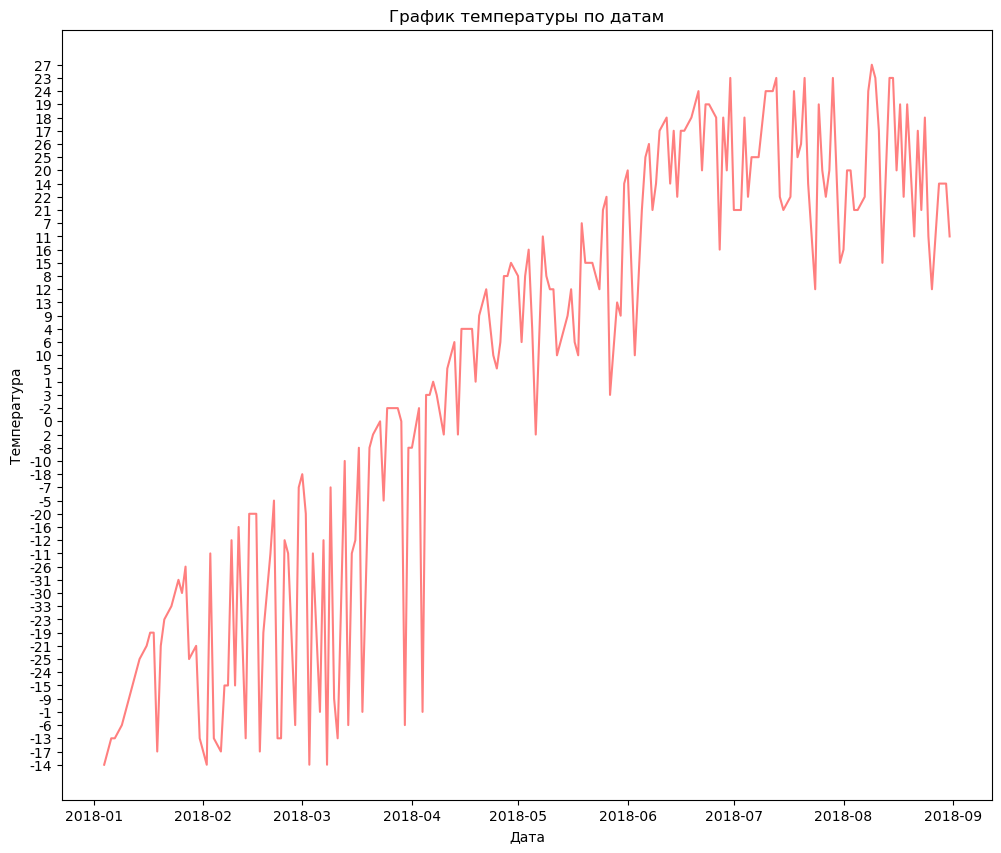

In [148]:
plt.figure(figsize=(12, 10))
plt.plot(merged_df['Дата'], merged_df['Avg Temp'], alpha=0.5, color='r')
plt.title('График температуры по датам')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.show()